In [94]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, SpatialDropout2D
from keras.utils import to_categorical
from keras.optimizers import Adam

In [95]:
x = np.load('data/X.npy')
y = np.load('data/Y.npy')

In [96]:
x = x.astype('float32') / 255.0

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [98]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

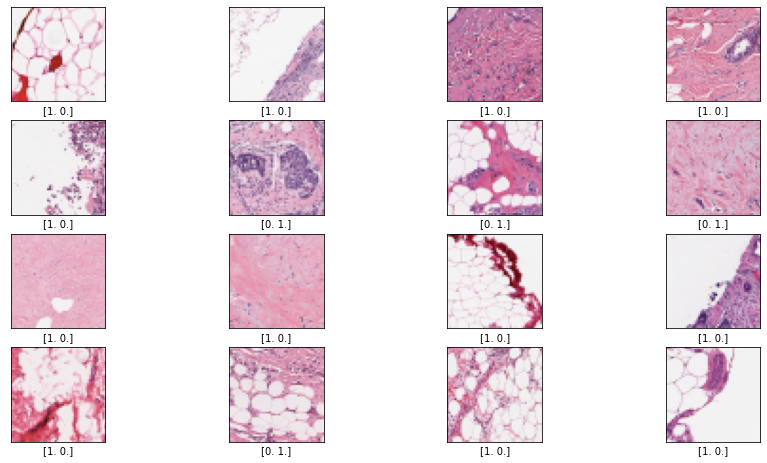

In [99]:
fig = plt.figure(figsize = (15,8))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])

In [100]:
input_shape = (x_train.shape[1], x_train.shape[2], 3)

In [138]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [139]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_105 (Conv2D)         (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 4, 4, 128)      

In [140]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
with tf.device('/gpu:0'):
  metrics = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
139/139 [==============================] - 7s 48ms/step - loss: 0.6424 - accuracy: 0.6275
Epoch 2/10
139/139 [==============================] - 7s 48ms/step - loss: 0.5723 - accuracy: 0.7183
Epoch 3/10
139/139 [==============================] - 7s 48ms/step - loss: 0.5597 - accuracy: 0.7235
Epoch 4/10
139/139 [==============================] - 7s 47ms/step - loss: 0.5508 - accuracy: 0.7401
Epoch 5/10
139/139 [==============================] - 7s 48ms/step - loss: 0.5302 - accuracy: 0.7483
Epoch 6/10
139/139 [==============================] - 7s 47ms/step - loss: 0.5407 - accuracy: 0.7368
Epoch 7/10
139/139 [==============================] - 7s 47ms/step - loss: 0.5201 - accuracy: 0.7537
Epoch 8/10
139/139 [==============================] - 7s 47ms/step - loss: 0.5297 - accuracy: 0.7437
Epoch 9/10
139/139 [==============================] - 7s 48ms/step - loss: 0.5165 - accuracy: 0.7579
Epoch 10/10
139/139 [==============================] - 7s 49ms/step - loss: 0.5209 - accura

In [142]:
loss, accuracy = model.evaluate(x_test, y_test)

35/35 [==============================] - 1s 11ms/step - loss: 0.5512 - accuracy: 0.7360


In [143]:
print(accuracy)

0.7360360622406006
